In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/train.csv')
accounts = pd.read_csv('../../data/account.csv')

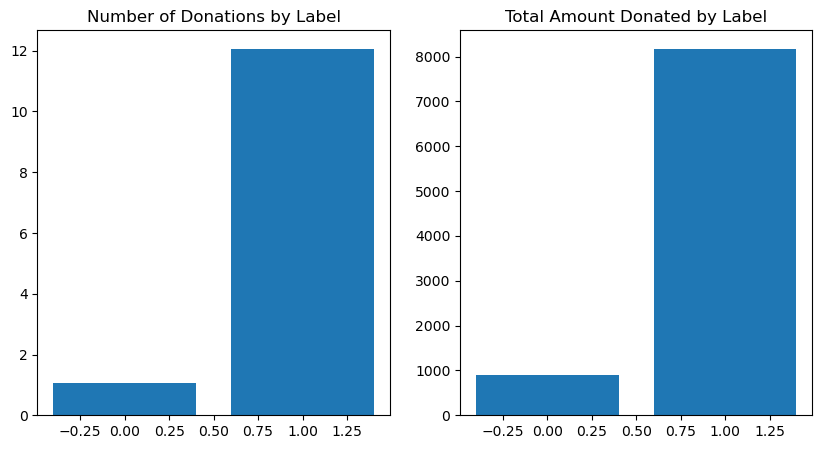

In [8]:
import matplotlib.pyplot as plt

# plot the relation between the number of donations and "label" on df (match the two dataframes on account.id)
# there is one row per account in accounts and in df
num_donations_by_label = df.merge(accounts, on='account.id').groupby('label')['no.donations.lifetime'].mean()

# plot the relation between the total amount donated against the label and "label" on df (match the two dataframes on account.id)
total_donated_by_label = df.merge(accounts, on='account.id').groupby('label')['amount.donated.lifetime'].mean()

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the number of donations on the first subplot
axs[0].bar(num_donations_by_label.index, num_donations_by_label.values)
axs[0].set_title('Number of Donations by Label')

# plot the total amount donated on the second subplot
axs[1].bar(total_donated_by_label.index, total_donated_by_label.values)
axs[1].set_title('Total Amount Donated by Label')

# display the plot
plt.show()
